# Notebook to display data
    Experiment data is returned as a Pandas DataFrame. We only need a small portion of the columns returned
    

In [1]:
!pip3 install ray[tune]
!pip3 install pandas==1.4.0
import matplotlib.pyplot as plt
from Training import model, utils, dataset, train
import numpy as np
from ray import tune
from ray.tune import CLIReporter
import pickle

In [2]:
def animate(frame):
    ax.view_init(30, frame/4)
    plt.pause(.001)
    return fig
def toVideo(fig):
    '''used to turn 3d plots to videos'''
    anim = animation.FuncAnimation(fig, animate, frames=500, interval=75)
    HTML(anim.to_html5_video())

## Load Data

In [3]:
experiment_name = "Feb-14-fix-uniform-2"
results = utils.openPickle(f"Experiments/{experiment_name}")
print(results.columns)

Index(['acc', 'part_acc', 'loss', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'experiment_tag', 'config.epochs',
       'config.lr', 'config.bs', 'config.loss_fn', 'config.optim'],
      dtype='object')


0 <class 'torch.optim.adagrad.Adagrad'>
1 <class 'torch.optim.sgd.SGD'>
2 <class 'torch.optim.adam.Adam'>


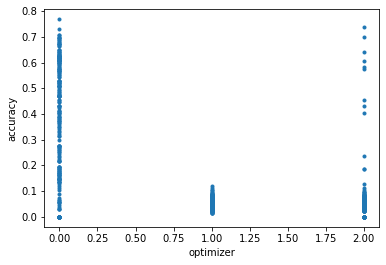

In [4]:
acc_optim = results.loc[:,["acc","config.optim"]]
optim_str = acc_optim.iloc[:,1].astype(str)
unique = optim_str.unique()
optim_dict = dict()
optim = np.array(optim_str)
for i,o in enumerate(unique):
    idx = np.where(optim==unique[i])
    optim[idx] = i
    print(i,o)
plt.xlabel("optimizer")
plt.ylabel("accuracy")
plt.scatter(optim,results.loc[:,"acc"], marker = "." )

0 L1Loss()
1 MSELoss()
2 HuberLoss()


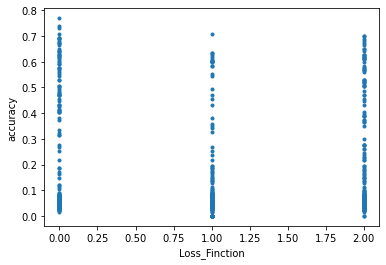

In [5]:
acc_optim = results.loc[:,["acc","config.loss_fn"]]
optim_str = acc_optim.iloc[:,1].astype(str)
unique = optim_str.unique()
optim_dict = dict()
optim = np.array(optim_str)
for i,o in enumerate(unique):
    idx = np.where(optim==unique[i])
    optim[idx] = i
    print(i,o)
plt.xlabel("Loss_Finction")
plt.ylabel("accuracy")
plt.scatter(optim,results.loc[:,"acc"], marker = "." )

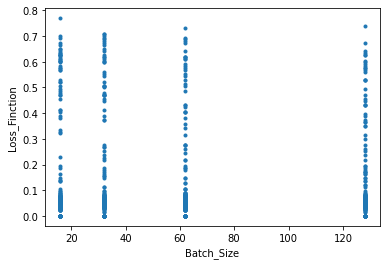

In [8]:
plt.xlabel("Batch_Size")
plt.ylabel("Loss_Finction")
plt.scatter(results.loc[:,"config.bs"],results.loc[:,"acc"], marker = "." )

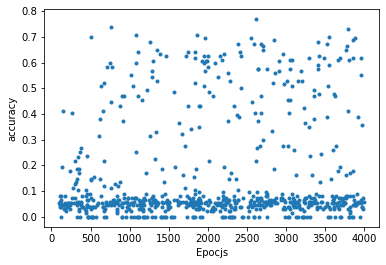

In [10]:
plt.xlabel("Epocjs")
plt.ylabel("accuracy")
plt.scatter(results.loc[:,"config.epochs"],results.loc[:,"acc"], marker = "." )